## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings

warnings.filterwarnings('ignore')
shap.initjs()

c:\Users\user\VSCodeProjects\flex-task\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load data

In [2]:
df = pd.read_csv('df.csv')
df.columns = df.columns.str.lower()
df['date'] = pd.to_datetime(df['date'])
df

,date,copper_price,buy_price,global_consumer_price_index,six_month_demand,gold_price,inventory
0,2020-01-01,3.137096,2.661115,117.999071,30.943593,2345.428509,11.721919
1,2020-02-01,3.080626,2.601521,121.141858,39.010606,2339.954887,34.574074
2,2020-03-01,3.116939,2.596875,122.787487,37.089984,1915.409552,28.794901
3,2020-04-01,3.180225,2.717195,124.483782,39.637642,2119.374158,40.498696
4,2020-05-01,3.220652,2.707316,121.855462,31.061250,2113.274844,34.927412
...,...,...,...,...,...,...,...
95,2027-12-01,3.510925,3.032640,196.290341,47.405890,2348.688526,22.279791
96,2028-01-01,3.397751,2.905826,197.409496,49.262588,2034.178653,6.486046
97,2028-02-01,3.251829,2.763559,199.246402,52.169598,1842.176256,46.331669
98,2028-03-01,3.259828,2.796132,199.289260,51.048567,2224.503966,39.992547


In [3]:
df.shape

(100, 7)

In [4]:
df_without_date = df.drop('date', axis=1)
df_without_date

,copper_price,buy_price,global_consumer_price_index,six_month_demand,gold_price,inventory
0,3.137096,2.661115,117.999071,30.943593,2345.428509,11.721919
1,3.080626,2.601521,121.141858,39.010606,2339.954887,34.574074
2,3.116939,2.596875,122.787487,37.089984,1915.409552,28.794901
3,3.180225,2.717195,124.483782,39.637642,2119.374158,40.498696
4,3.220652,2.707316,121.855462,31.061250,2113.274844,34.927412
...,...,...,...,...,...,...
95,3.510925,3.032640,196.290341,47.405890,2348.688526,22.279791
96,3.397751,2.905826,197.409496,49.262588,2034.178653,6.486046
97,3.251829,2.763559,199.246402,52.169598,1842.176256,46.331669
98,3.259828,2.796132,199.289260,51.048567,2224.503966,39.992547


                             copper_price  buy_price  \
copper_price                     1.000000   0.997849   
buy_price                        0.997849   1.000000   
global_consumer_price_index     -0.074692  -0.069915   
six_month_demand                -0.083283  -0.079522   
gold_price                       0.012948   0.023903   
inventory                       -0.099819  -0.096886   

                             global_consumer_price_index  six_month_demand  \
copper_price                                   -0.074692         -0.083283   
buy_price                                      -0.069915         -0.079522   
global_consumer_price_index                     1.000000          0.547820   
six_month_demand                                0.547820          1.000000   
gold_price                                      0.129320          0.102640   
inventory                                       0.238538          0.473308   

                             gold_price  inventory  
copper_

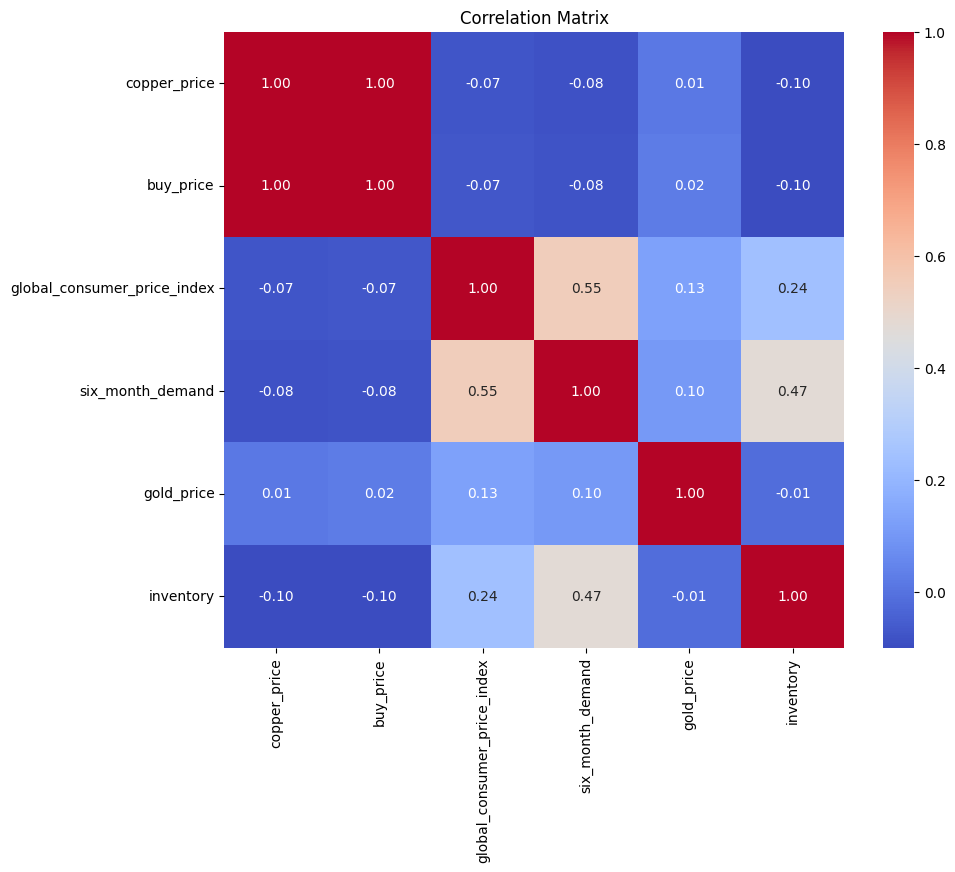

In [28]:
corr_matrix = df_without_date.corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [6]:
# import pandas as pd
# from plotly.subplots import make_subplots

# import plotly.graph_objects as go

# # Assuming df is your DataFrame and it has a column named 'time'
# # Example:
# # df = pd.read_csv('your_dataset.csv')

# # Extract the year from the 'time' column
# df['year'] = pd.to_datetime(df['date']).dt.year

# # Get unique years
# years = df['year'].unique()

# # Create a subplot layout with one row per year
# fig = make_subplots(rows=len(years), cols=1, shared_xaxes=True, vertical_spacing=0.1, subplot_titles=[str(year) for year in years])

# # Loop through each year and create a correlation matrix
# for i, year in enumerate(years):
#     # Filter the dataframe for the current year
#     df_year = df[df['year'] == year]
    
#     to_drop = ['year', 'date']
#     # Exclude the 'year' column from the correlation matrix
#     corr_matrix = df_year.drop(to_drop, axis=1).corr()
    
#     # Create a heatmap for the correlation matrix
#     heatmap = go.Heatmap(
#         z=corr_matrix.values,
#         x=corr_matrix.columns,
#         y=corr_matrix.columns,
#         colorscale='viridis',
#         zmin=-1, zmax=1,
#         showscale=True,
#         ygap=2,
#         xgap=2
#     )
    
#     # Add the heatmap to the subplot
#     fig.add_trace(heatmap, row=i+1, col=1)

# # Update layout
# fig.update_layout(
#     height=1000 * len(years),  # Adjust the height based on the number of years
#     title='Correlation Matrix for Each Year',
#     showlegend=True
# )

# # Show the figure
# fig.show()


## Visualize data

In [7]:
import plotly.express as px

fig = px.line(df, x='date', y=df.columns[1:], title="Values Over Time")

fig.show()

In [8]:
import plotly.graph_objects as go
import pandas as pd

# Assuming df is your DataFrame and it has columns: 'date', 'gold_price', 'category1', 'category2', ...

# Create the figure
fig = go.Figure()

# Add trace for gold_price with secondary y-axis
fig.add_trace(
    go.Scatter(x=df['date'], y=df['gold_price'], name='gold_price', yaxis='y2')
)

# Add traces for other categories
categories = df.columns.difference(['date', 'gold_price'])
for category in categories:
    fig.add_trace(
        go.Scatter(x=df['date'], y=df[category], name=category)
    )

# Update layout for dual y-axis
fig.update_layout(
    xaxis=dict(title='Date'),
    yaxis=dict(title='Values except gold_price'),
    yaxis2=dict(title='Gold Price', overlaying='y', side='right'),
    title='Chart with Dual Y-Axis',
    legend=dict(
        x=0.5,  # Horizontal position (0: left, 1: right)
        y=-1,    # Vertical position (0: bottom, 1: top)
        xanchor='center',  # Horizontal anchor
        yanchor='bottom'      # Vertical anchor
    )
)

# Show the figure
fig.show()

## Splitting dataset

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and target (y)
X = df_without_date.drop('six_month_demand', axis=1)
y = df_without_date['six_month_demand']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features if necessary
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (80, 5)
X_test shape: (20, 5)


# RandomForestRegressor

## Finding key variables influencing ***six_month_demand*** factor

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train_scaled, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualizing feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                       Feature  Importance
2  global_consumer_price_index    0.383623
4                    inventory    0.292486
3                   gold_price    0.146550
0                 copper_price    0.093655
1                    buy_price    0.083686


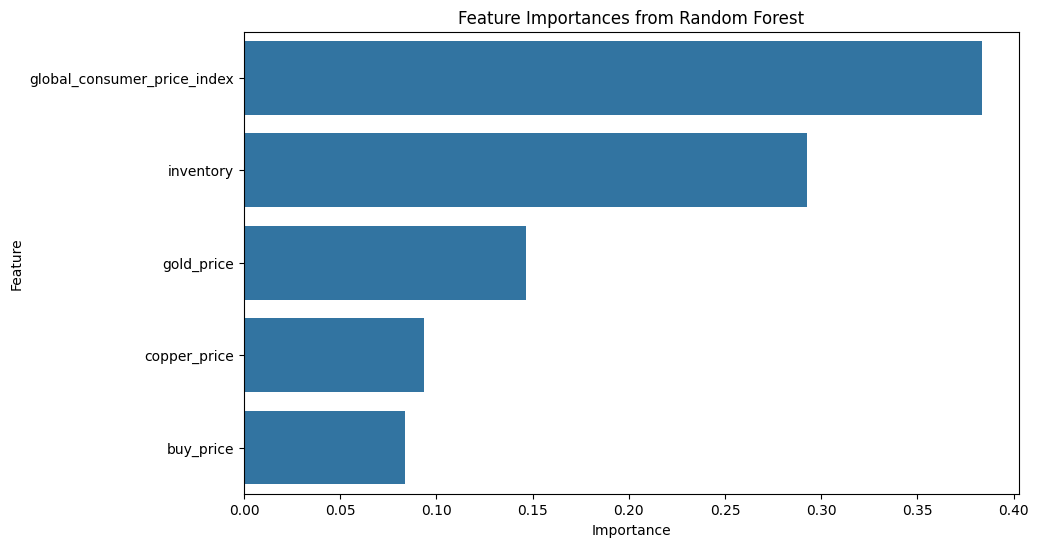

In [11]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Training of the model and prediction on test dataset

In [12]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Stworzenie modelu regresji RandomForest
rf_regressor = RandomForestRegressor(n_estimators=250, max_depth=7, random_state=42)

# Trening modelu regresyjnego
rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=7, n_estimators=250, random_state=42)

In [14]:
# Predykcje na zbiorze testowym
y_pred = rf_regressor.predict(X_test_scaled)

# Ewaluacja modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
acc = rf_regressor.score(X_test_scaled, y_test)

# Wyświetlenie wyników
print(f'Mean Squared Error value: {mse:.2f}')
print(f'R-squared value: {r2:.2f}')
print(f'Accuracy: {acc:.2f}')

importances = rf_regressor.feature_importances_
print(importances)

Mean Squared Error value: 15.83
R-squared value: 0.74
Accuracy: 0.74
[0.09654849 0.07629923 0.38311512 0.14816273 0.29587444]


In [15]:
cross_val_results = cross_val_score(rf_regressor, X_test_scaled, y_pred, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [ 0.3279525  -0.73786859  0.61711995  0.70312687  0.745899  ]
Mean Accuracy: 0.33124594820697384


## eXplainable AI to determine influence of each variable on the output

In [16]:
explainer = shap.Explainer(rf_regressor)
shap_values = explainer.shap_values(X_test_scaled)

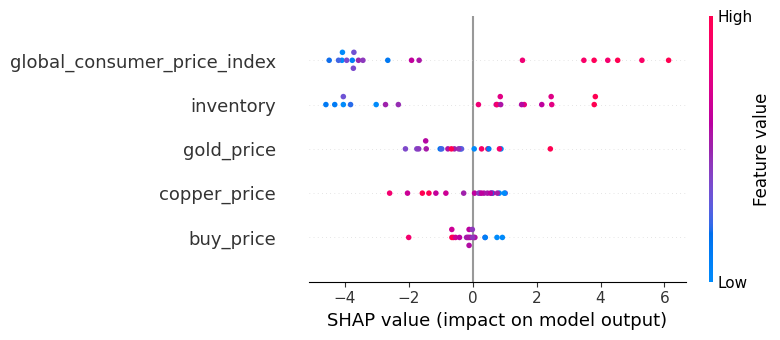

In [17]:
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

# Linear Regression

In [18]:
# from sklearn.linear_model import LinearRegression

# l_reg_import = LinearRegression()

# # Fit the model
# l_reg_import.fit(X_train, y_train)

# # Get importance
# importance_lr = l_reg_import.coef_

# # Summarize feature importance
# for i, v in enumerate(importance_lr):
#     print('Feature: %0d, Score: %.5f' % (i, v))

# # Plot feature importance
# plt.bar([x for x in range(len(importance_lr))], importance_lr)
# plt.xlabel('Feature Index')
# plt.ylabel('Importance Score')
# plt.title('Feature Importance in Linear Regression')
# plt.show()

In [19]:
# lr_regression = LinearRegression()

# lr_regression.fit(X_train, y_train)

In [20]:
# # Predykcje na zbiorze testowym
# y_pred = lr_regression.predict(X_test)

# # Ewaluacja modelu
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# acc = lr_regression.score(X_test, y_test)

# # Wyświetlenie wyników
# print(f'Mean Squared Error value: {mse:.2f}')
# print(f'R-squared value: {r2:.2f}')
# print(f'Accuracy: {acc:.2f}')

# print(importance_lr)

In [21]:
# from sklearn.svm import SVR

# svr_model = SVR(kernel='linear')  # You can choose 'linear', 'poly', 'rbf', 'sigmoid', etc.

# # Fit the model
# svr_model.fit(X_train, y_train)


# feature_importances = np.abs(svr_model.coef_)
# print(feature_importances)

In [22]:
# # Optionally, make predictions
# y_pred = svr_model.predict(X_train)

# # Evaluate the model
# mse = mean_squared_error(y_train, y_pred)
# r2 = r2_score(y_train, y_pred)
# acc = svr_model.score(X_train, y_train)

# print(f'Mean Squared Error: {mse}')
# print(f'R^2 Score: {r2}')
# print(f'Accuracy: {acc}')

# # Optionally, plot the predictions vs actual values
# import matplotlib.pyplot as plt

# plt.scatter(range(len(y_train)), y_train, color='blue', label='Actual')
# plt.scatter(range(len(y_train)), y_pred, color='red', label='Predicted')
# plt.xlabel('Sample Index')
# plt.ylabel('Target Value')
# plt.title('SVR Model Predictions vs Actual Values')
# plt.legend()
# plt.show()

# DecisionTree

In [23]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# dt_regressor = DecisionTreeRegressor(random_state=42)

# # Fit the model
# dt_regressor.fit(X_train, y_train)

# importance_dt = dt_regressor.feature_importances_
# feature_importances_dt = pd.DataFrame({'Feature': X.columns, 'Importance': importance_dt})
# feature_importances_dt = feature_importances_dt.sort_values(by='Importance', ascending=False)

# print(feature_importances_dt)

# # Plot feature importances
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(importance_dt)), importance_dt)
# plt.xticks(range(len(importance_dt)), X_train.columns, rotation=45)
# plt.xlabel('Feature')
# plt.ylabel('Importance')
# plt.title('Feature Importances from Decision Tree')
# plt.show()

In [24]:
# # Predykcje na zbiorze testowym
# y_pred = dt_regressor.predict(X_test)

# # Ewaluacja modelu
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# acc = dt_regressor.score(X_test, y_test)

# # Wyświetlenie wyników
# print(f'Mean Squared Error value: {mse:.2f}')
# print(f'R-squared value: {r2:.2f}')
# print(f'Accuracy: {acc:.2f}')

# importances = dt_regressor.feature_importances_
# print(importances)


In [25]:
# cross_val_results = cross_val_score(dt_regressor, X_test, y_pred, cv=kf)
# print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
# print(f'Mean Accuracy: {cross_val_results.mean()}')

In [26]:
# explainer = shap.Explainer(dt_regressor)
# shap_values = explainer.shap_values(X_test)

In [27]:
# shap.summary_plot(shap_values, X_test)